Write a function that can shift an MNIST image in any direction (left, right, up, down) by one pixel. Then for each image in the training set, create four shifted copies (one for each direction) and add them to training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. (Data augmentation or training set expansion)

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X, y = mnist.data, mnist.target

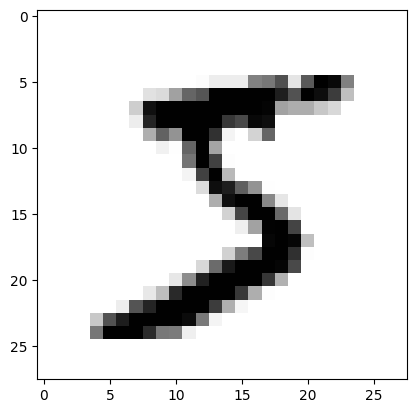

In [3]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.show()

some_digit = X[0]
plot_digit(some_digit)

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
from scipy.ndimage import shift

def shift_image(image_data, dx, dy):
    image = image_data.reshape(28, 28)
    shifted_image = shift(image, [dy, dx], cval=0, mode='constant')
    return shifted_image.reshape([-1])

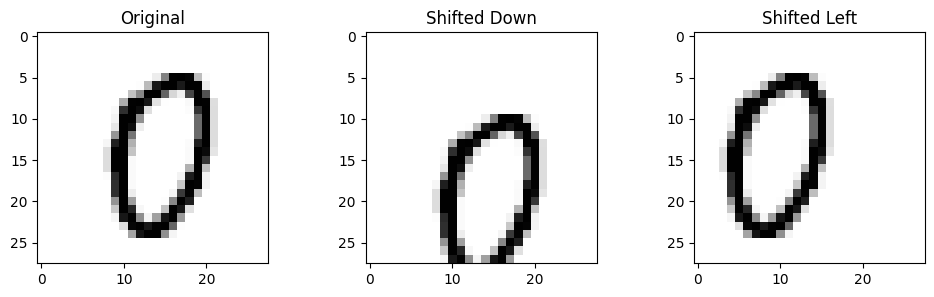

In [8]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize = (12, 3))
plt.subplot(131)
plt.title('Original')
plt.imshow(image.reshape(28, 28),
           interpolation='nearest', cmap='Greys')
plt.subplot(132)
plt.title('Shifted Down')
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation='nearest', cmap='Greys')
plt.subplot(133)
plt.title('Shifted Left')
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation='nearest', cmap='Greys')
plt.show()

In [9]:
import numpy as np

X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [10]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10000], y_train[:10000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [12]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [13]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [15]:
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy

0.9763